## Checkpoint 1: Data Cleaning 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Loading DataSets

In [3]:
companies = pd.read_csv("companies.csv", encoding='latin1')

In [4]:
rounds2 = pd.read_csv("rounds2.csv", encoding='latin1')

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Data Cleaning

### For Companies DataSet

In [7]:
companies.shape

(66368, 10)

In [8]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [9]:
# For companies dataset we are mainly bothered about permalink and country_code
# Country_Code has lot of null values which is of no use
# Country_Code can be left as it is also, because it will not make any impact here for string values, 
# and it constitutes 10% of total data
companies = companies[~companies['country_code'].isnull()]

In [10]:
# Category_List having null values can also be removed as it will be handled automatically while joining with DataSet Mapping

In [11]:
companies = companies.drop(['founded_at'], axis=1)

In [12]:
companies = companies.drop(['state_code'], axis=1)

In [13]:
companies = companies.drop(['region'], axis=1)

In [14]:
companies = companies.drop(['city'], axis=1)

In [15]:
companies.shape

(59410, 6)

In [16]:
companies.isnull().sum()

permalink           0
name                1
homepage_url     3652
category_list    1606
status              0
country_code        0
dtype: int64

### For Rounds2 DataSet

In [17]:
rounds2.shape

(114949, 6)

In [18]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [19]:
# Since funding_round_code has most Data null, the column can be dropped, and has no reference for future use
rounds2 = rounds2.drop(['funding_round_code'], axis=1)

In [20]:
rounds2 = rounds2.drop(['funded_at'], axis=1)

In [21]:
rounds2.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

Here Median value for raised_amount_usd is 1,680,511 i.e. 1.68M (Max is too high, so Median cannot be considered anyways)
But we are considering Amount from 5M to 15M, to fulfill are objective, therefore this can be ignored/dropped
Moreover it constitutes to around 15% of the Total Data in Rounds2 DataSet

In [22]:
# raised_amount_usd is one of the main fields for analysis and we can remove null values which is around 15% of total data
rounds2 = rounds2[~rounds2['raised_amount_usd'].isnull()]

In [23]:
rounds2.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
raised_amount_usd          0
dtype: int64

### Unique Constraints in DataSets

In [24]:
#rounds2[rounds2.company_permalink == '/organization/-qounter']
#rounds2.company_permalink.value_counts()
#As in the output it shows correct count but while summing up it will take multiple occurences of the same company, 
#hence will result in wrong output

In [25]:
rounds2.company_permalink.nunique()
#When dataset was analyzed in general its found that there dupicate columns, just that they are in different case, 
#therefore such a huge difference seen in unique company names

73780

In [26]:
companies.permalink.nunique()

59410

In [27]:
#companies.name.nunique()
#There are duplicate emtries in this column

In [28]:
companies["permalink"] = companies["permalink"].str.lower()
companies.permalink.nunique()

59410

In [29]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
rounds2.company_permalink.nunique()

53915

In [30]:
#To check rows which are present in Rounds2 but not in Companies
rounds2[rounds2.company_permalink.isin(companies.permalink) == False]

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,43923865.0
66,/organization/10k-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,100000.0
95,/organization/1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,150267.0
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,500000.0
...,...,...,...,...
114752,/organization/zuggi,/funding-round/e8fa50bcf4086dc88c07a901258b8b4f,seed,40000.0
114835,/organization/zuumtel,/funding-round/785ed8667f9d950257f94089050d6eb0,angel,200000.0
114836,/organization/zuumtel,/funding-round/d5d97d7c8a5e923715b15495d44e7cb8,seed,100000.0
114849,"/organization/zwayo-""on-demand-valet-parking""",/funding-round/eb5163bb6feea4384121e27699bb7b25,seed,60000.0


### Merge DataSets Rounds2 and Companies

In [31]:
master_frame = pd.merge(rounds2, companies, how='left', left_on='company_permalink', right_on='permalink')

In [32]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,NaN,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN
4,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG


In [33]:
# company_permalink and permalink are redundant columns, therefore dropping permalink
master_frame = master_frame.drop(['permalink'], axis=1)

In [34]:
'''Plot to check most Invested Sectors''' 
#plt.title('Funding Type Distribution')
#plt.ylabel('Funding Type')
#plt.xlabel('Frequency')

#master_frame.funding_round_type.value_counts().plot.barh()

'Plot to check most Invested Sectors'

In [35]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 94958
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   raised_amount_usd        94959 non-null  float64
 4   name                     89107 non-null  object 
 5   homepage_url             85730 non-null  object 
 6   category_list            88529 non-null  object 
 7   status                   89108 non-null  object 
 8   country_code             89108 non-null  object 
dtypes: float64(1), object(8)
memory usage: 7.2+ MB


## Checkpoint 2: Funding Type Analysis

### Representative Funding Figures for various Types

In [36]:
master_frame[master_frame.funding_round_type.isin(['angel','private_equity','seed','venture'])].describe()

,raised_amount_usd
count,8.062700e+04
mean,9.347995e+06
std,7.562940e+07
min,0.000000e+00
25%,4.000000e+05
50%,2.000000e+06
75%,7.975496e+06
max,1.760000e+10


Since there are Outliers as seen at 100th Quantile, it is preferable to use Medain (50th percentile)

In [37]:
#master_frame[master_frame.funding_round_type.isin(['angel','private_equity','seed','venture'])]\
#    .groupby(["funding_round_type"]).agg(Mean_Val=("raised_amount_usd", lambda x: round(x.mean(), 1)),
#    Count_Val=("raised_amount_usd", 'count'))

In [38]:
#Min_days=("Days", 'min'),
#10,000,000 - 11,748,949.1
master_frame[master_frame.funding_round_type.isin(['angel','private_equity','seed','venture'])]\
    .groupby(["funding_round_type"]).agg(Median_Val=("raised_amount_usd", lambda x: round(x.median(), 1)),
    Count_Val=("raised_amount_usd", 'count'))

,Median_Val,Count_Val
funding_round_type,,
angel,400000.0,4860
private_equity,20000000.0,1936
seed,275000.0,23603
venture,5000000.0,50228


## Checkpoint 3: Country Analysis

In [40]:
# Spark Funds wants to see the top nine countries which have received the highest total funding 
# (across ALL sectors for the chosen investmenmaster_frame[master_frame.funding_round_type == 'venture'].groupby(["funding_round_type", "country_code"])\
#        .agg(Total_Amt=("raised_amount_usd", 'sum')).sort_values(['Total_Amt'], ascending=False).head(9)t type)
# Considering above statement We have to sum the Total Money across all countries for ventures to get the figures


In [41]:
temp = master_frame[master_frame.funding_round_type == 'venture'].groupby(["funding_round_type", "country_code"])\
        .agg(Total_Amt=("raised_amount_usd", 'sum')).sort_values(['Total_Amt'], ascending=False).head(9)

In [42]:
#temp.to_frame().reset_index()
print(type(temp))

<class 'pandas.core.frame.DataFrame'>


In [43]:
# To get top9 countries from variables instead of using hardcoded once
temp = temp.Total_Amt.to_frame().reset_index()

In [44]:
temp.country_code.head(9)

0    USA
1    CHN
2    GBR
3    IND
4    CAN
5    FRA
6    ISR
7    DEU
8    JPN
Name: country_code, dtype: object

In [45]:
# New DF top9 with data of the Top 9 countries where the Total Investment was highest
#top9 = master_frame[(master_frame.funding_round_type == 'venture') & master_frame.country_code.isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

In [46]:
top9 = master_frame[(master_frame.funding_round_type == 'venture') & \
                    master_frame.country_code.isin(temp.country_code.head(9))]

In [47]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN
6,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN
8,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA
9,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA


In [48]:
top9.groupby(["funding_round_type", "country_code"])\
        .agg(Total_Amt=("raised_amount_usd", 'sum')).sort_values(['Total_Amt'], ascending=False)

Total_Amt
funding_round_type country_code              
venture            USA           4.225108e+11
                   CHN           3.983542e+10
                   GBR           2.024563e+10
                   IND           1.439186e+10
                   CAN           9.583332e+09
                   FRA           7.259537e+09
                   ISR           6.907515e+09
                   DEU           6.346960e+09
                   JPN           3.363677e+09

In [49]:

#fig = px.bar(top9, x = 'country_code', y = 'raised_amount_usd', marker={'color': raised_amount_usd,
                                             #  'colorscale': 'Viridis'})
#fig.show()

In [50]:
'''Plot to check Top 9 Countries and Corresponding Investment'''
#plt.title('Venture Type Investment')
#plt.ylabel('Amount')
#plt.xlabel('Country')
#plt.bar(x=top9.country_code, height=top9.raised_amount_usd)

'Plot to check Top 9 Countries and Corresponding Investment'

In [51]:
top9[top9.country_code == 'NLP'].head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code


In [52]:
top9[top9.country_code.isin(['USA','GBR','IND'])].head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND
8,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA
9,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA
10,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA
16,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA


In [53]:
top3 = top9[top9.country_code.isin(['USA','GBR','IND'])]

In [54]:
top3.groupby(["funding_round_type", "country_code"])\
        .agg(Total_Amt=("raised_amount_usd", 'sum')).sort_values(['Total_Amt'], ascending=False)

Total_Amt
funding_round_type country_code              
venture            USA           4.225108e+11
                   GBR           2.024563e+10
                   IND           1.439186e+10

In [55]:
'''Plot to get Top3 Countries with Highest Investment under Venture Type'''
#plt.title('Venture Type Investment')
#plt.ylabel('Amount')
#plt.xlabel('Country')
#plt.bar(x=top3.country_code, height=top3.raised_amount_usd)

'Plot to get Top3 Countries with Highest Investment under Venture Type'

## Checkpoint 4: Sector Analysis 1

In [56]:
top3.category_list

0                                   Media
8                               Analytics
9                               Analytics
10                              Analytics
16       Apps|Cable|Distribution|Software
                       ...               
94932                       Biotechnology
94934                       Biotechnology
94935                       Biotechnology
94945                          E-Commerce
94947                       Biotechnology
Name: category_list, Length: 39018, dtype: object

In [57]:
'''# Business rule that the first string before the vertical bar will be considered the primary sector. In the example above, 
# ‘Application Platforms’ will be considered the primary sector.
# Getting only 1st part of the String'''
top3.category_list = top3.category_list.str.split('|').str[0]

In [58]:
top3.category_list

0                Media
8            Analytics
9            Analytics
10           Analytics
16                Apps
             ...      
94932    Biotechnology
94934    Biotechnology
94935    Biotechnology
94945       E-Commerce
94947    Biotechnology
Name: category_list, Length: 39018, dtype: object

In [59]:
mapping = pd.read_csv("mapping.csv")

In [60]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [61]:
# Adding Primary Column to Store the Primary Sector only for respective Category
# And then taking all the Column names wherever it has value 1 and storing in a new column primary
mapping.set_index("category_list", inplace=True)
mapping['primary'] = mapping.where(mapping == 0, 
                                  other=mapping.apply(lambda x: x.name),
                                  axis=1).where(mapping != 0, 
                                                other="").apply(lambda row: ''.join(row.values), axis=1)

### Merging list of Top3 countries and records with Mapping to get all the Sectors

In [62]:

top3 = pd.merge(top3, mapping[['primary']], how='left', on='category_list')

In [63]:
# to check if any other funding_type is still present except venture
top3[(~(top3.funding_round_type == 'venture'))]

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,primary


## Checkpoint 5: Sector Analysis 2

In [64]:
D1 = top3[(top3.country_code == 'USA') & (top3.raised_amount_usd >= 5000000) & (top3.raised_amount_usd <= 15000000)]

In [65]:
D2 = top3[(top3.country_code == 'GBR') & (top3.raised_amount_usd >= 5000000) & (top3.raised_amount_usd <= 15000000)]

In [66]:
D3 = top3[(top3.country_code == 'IND') & (top3.raised_amount_usd >= 5000000) & (top3.raised_amount_usd <= 15000000)]

In [67]:
#sns.factorplot(x='country_code', y='raised_amount_usd', hue='country_code', kind='bar', data=top3)

### Total number of Investments (count)

In [68]:
D1.shape

(12150, 10)

In [69]:
D2.shape

(628, 10)

In [70]:
D3.shape

(330, 10)

### Total amount of investment (USD)

In [71]:
D1.raised_amount_usd.sum()

108531347515.0

In [72]:
D2.raised_amount_usd.sum()

5436843539.0

In [73]:
D3.raised_amount_usd.sum()

2976543602.0

In [74]:
#D3.raised_amount_usd.mean()

### Top Sector name (no. of investment-wise)

In [75]:
D1.groupby(["primary"]).agg(Count_Val=("primary", 'count')).sort_values(['Count_Val'], ascending=False)

,Count_Val
primary,
Others,2923
Cleantech / Semiconductors,2297
"Social, Finance, Analytics, Advertising",1912
"News, Search and Messaging",1563
Health,908
Manufacturing,799
Entertainment,580
Automotive & Sports,167
Blanks,86


In [76]:
D2.groupby(["primary"]).agg(Count_Val=("primary", 'count')).sort_values(['Count_Val'], ascending=False)

,Count_Val
primary,
Others,143
Cleantech / Semiconductors,127
"Social, Finance, Analytics, Advertising",98
"News, Search and Messaging",73
Entertainment,54
Manufacturing,42
Health,24
Automotive & Sports,16
Blanks,7


In [77]:
D3.groupby(["primary"]).agg(Count_Val=("primary", 'count')).sort_values(['Count_Val'], ascending=False)

,Count_Val
primary,
Others,109
"News, Search and Messaging",52
Entertainment,33
"Social, Finance, Analytics, Advertising",32
Manufacturing,21
Cleantech / Semiconductors,20
Health,19
Automotive & Sports,13
Blanks,2


### Which company received the highest investment? (top sector count-wise)

In [78]:
D1[D1.primary == 'Others'].groupby(["primary","name"]).agg(Total_Val=\
                ("raised_amount_usd", lambda x: round(x.sum(), 0))).sort_values(['Total_Val'], ascending=False).head()
                                #,Count_Val=('primary','count')).sort_values(['Total_Val'], ascending=False).head()

Total_Val
primary name                           
Others  Virtustream          64300000.0
        Capella Photonics    54968051.0
        AirTight Networks    54201907.0
        deCarta              52100000.0
        Black Duck Software  51000000.0

In [79]:
D2[D2.primary == 'Others'].groupby(["primary","name"]).agg(Total_Val=\
            ("raised_amount_usd", lambda x: round(x.sum(), 0))).sort_values(['Total_Val'], ascending=False).head()
                                #,Count_Val=('primary','count')).sort_values(['Total_Val'], ascending=False).head()

Total_Val
primary name                               
Others  Electric Cloud           37000000.0
        SenSage                  36250000.0
        Enigmatec                32500000.0
        SilverRail Technologies  29000000.0
        OpenCloud                27972766.0

In [80]:
D3[D3.primary == 'Others'].groupby(["primary","name"]).agg(Total_Val=\
                ("raised_amount_usd", lambda x: round(x.sum(), 0))).sort_values(['Total_Val'], ascending=False).head()
                                #,Count_Val=('primary','count')).sort_values(['Total_Val'], ascending=False).head()

Total_Val
primary name                         
Others  FirstCry.com       39000000.0
        Myntra             38000000.0
        CommonFloor        32900000.0
        Pepperfry.com      28000000.0
        ItzCash Card Ltd.  25000000.0

### Which company received the highest investment? (second best sector count-wise)

In [81]:
D1[D1.primary == 'Cleantech / Semiconductors'].groupby(["primary","name"]).agg(Total_Val=\
                ("raised_amount_usd", lambda x: round(x.sum(), 0))).sort_values(['Total_Val'], ascending=False).head()
                                #,Count_Val=('primary','count')).sort_values(['Total_Val'], ascending=False).head()

Total_Val
primary                    name                     
Cleantech / Semiconductors Biodesix       75300000.0
                           Tigo Energy    68739496.0
                           ForSight Labs  61300001.0
                           Rheonix        56124758.0
                           SCIenergy      55375423.0

In [82]:
D2[D2.primary == 'Cleantech / Semiconductors'].groupby(["primary","name"]).agg(Total_Val=\
                ("raised_amount_usd", lambda x: round(x.sum(), 0))).sort_values(['Total_Val'], ascending=False).head()
                                #,Count_Val=('primary','count')).sort_values(['Total_Val'], ascending=False).head()

Total_Val
primary                    name                                    
Cleantech / Semiconductors EUSA Pharma                   35600000.0
                           Horizon Discovery             31353719.0
                           F-star Biotechnology Limited  29132906.0
                           Elixent                       25000000.0
                           Takeda Cambridge              22340000.0

In [83]:
D3[D3.primary == 'News, Search and Messaging'].groupby(["primary","name"]).agg(Total_Val=\
                ("raised_amount_usd", lambda x: round(x.sum(), 0))).sort_values(['Total_Val'], ascending=False).head()
                                #,Count_Val=('primary','count')).sort_values(['Total_Val'], ascending=False).head()

Total_Val
primary                    name                   
News, Search and Messaging GupShup      33000000.0
                           IMImobile    23000000.0
                           SMS GupShup  22000000.0
                           hike         21000000.0
                           Roadrunnr    21000000.0

## Checkpoint 6: Plots

1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [84]:
master_frame[master_frame.funding_round_type.isin(['angel','private_equity','seed','venture'])]\
    .groupby(["funding_round_type"],as_index=True).agg(Mean_Val=("raised_amount_usd", lambda x: round(x.mean(), 1)),
    Count_Val=("raised_amount_usd", 'count'))

,Mean_Val,Count_Val
funding_round_type,,
angel,958694.5,4860
private_equity,73308593.0,1936
seed,719818.0,23603
venture,11748949.1,50228


In [85]:
ft = master_frame[master_frame.funding_round_type.isin(['angel','private_equity','seed','venture'])]

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

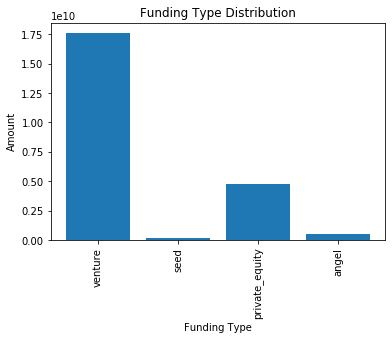

In [86]:
plt.title('Funding Type Distribution')
plt.ylabel('Amount')
plt.xlabel('Funding Type')

#master_frame.funding_round_type.sum().plot.barh()
plt.bar(x=ft.funding_round_type, height=ft.raised_amount_usd)
plt.xticks(rotation=90)

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. 

<BarContainer object of 44383 artists>

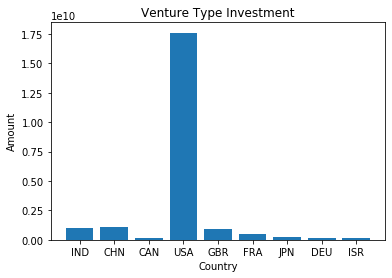

In [87]:
plt.title('Venture Type Investment')
plt.ylabel('Amount')
plt.xlabel('Country')
plt.bar(x=top9.country_code, height=top9.raised_amount_usd)

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [88]:
#top3.groupby("country_code")['primary'].value_counts().plot(kind='bar')

In [89]:
#?pd.concat

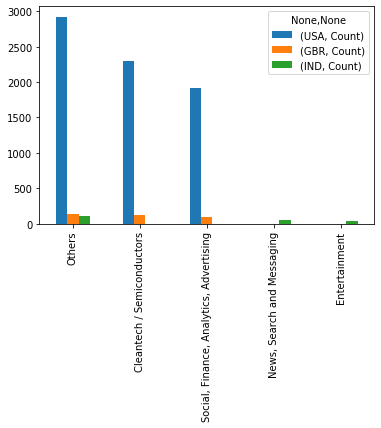

In [90]:
pd.concat({
    'USA': D1.groupby(["primary"]).agg(Count=("primary", 'count')).sort_values(['Count'], ascending=False).head(3),
    'GBR': D2.groupby(["primary"]).agg(Count=("primary", 'count')).sort_values(['Count'], ascending=False).head(3),
    'IND': D3.groupby(["primary"]).agg(Count=("primary", 'count')).sort_values(['Count'], ascending=False).head(3)
}, axis=1).plot.bar()